In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [59]:
a=pd.read_csv('GroceryStoreDataSet.csv')

In [60]:
a.head()

,Items
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [61]:
b = a['Items'].str.split(',', expand=True)
b
b.columns = ['Items'+str(i) for i in b.columns]

bc = pd.concat([a,b], axis=1)
bc
a=bc.drop('Items',axis=1)
a


,Items0,Items1,Items2,Items3
0,MILK,BREAD,BISCUIT,None
1,BREAD,MILK,BISCUIT,CORNFLAKES
2,BREAD,TEA,BOURNVITA,None
3,JAM,MAGGI,BREAD,MILK
4,MAGGI,TEA,BISCUIT,None
5,BREAD,TEA,BOURNVITA,None
6,MAGGI,TEA,CORNFLAKES,None
7,MAGGI,BREAD,TEA,BISCUIT
8,JAM,MAGGI,BREAD,TEA
9,BREAD,MILK,None,None


In [62]:
r=pd.get_dummies(pd.DataFrame(a.values.tolist()),prefix_sep ='',prefix='').sum(level=0, axis = 1) 

In [63]:
r

,BREAD,COFFEE,JAM,MAGGI,MILK,TEA,COCK,SUGER,BISCUIT,BOURNVITA,CORNFLAKES
0,1,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1
2,1,0,0,0,0,1,0,0,0,1,0
3,1,0,1,1,1,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,1,0,0
5,1,0,0,0,0,1,0,0,0,1,0
6,0,0,0,1,0,1,0,0,0,0,1
7,1,0,0,1,0,1,0,0,1,0,0
8,1,0,1,1,0,1,0,0,0,0,0
9,1,0,0,0,1,0,0,0,0,0,0


In [64]:
r.shape

(20, 11)

# Finding the most frequent itemsets that you will find in your experiment.

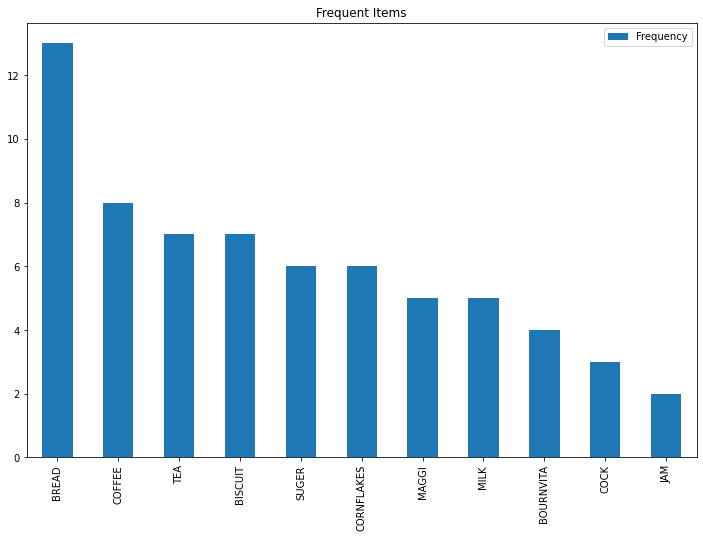

In [65]:
r.sum().to_frame('Frequency').sort_values('Frequency',ascending=False).plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

In [66]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [67]:
frequent_itemsets = apriori(r, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.65,(BREAD),1
1,0.40,(COFFEE),1
2,0.10,(JAM),1
3,0.25,(MAGGI),1
4,0.25,(MILK),1
...,...,...,...
78,0.05,"(JAM, TEA, MAGGI, BREAD)",4
79,0.05,"(BISCUIT, MAGGI, TEA, BREAD)",4
80,0.05,"(CORNFLAKES, BISCUIT, MILK, BREAD)",4
81,0.05,"(COFFEE, CORNFLAKES, MILK, TEA)",4


In [68]:
frequent_itemsets.sort_values(by = "support" , ascending = False)

,support,itemsets,length
0,0.65,(BREAD),1
1,0.40,(COFFEE),1
5,0.35,(TEA),1
8,0.35,(BISCUIT),1
7,0.30,(SUGER),1
...,...,...,...
22,0.05,"(COFFEE, TEA)",2
59,0.05,"(SUGER, BISCUIT, BREAD)",3
61,0.05,"(CORNFLAKES, BISCUIT, BREAD)",3
62,0.05,"(COFFEE, MILK, TEA)",3


In [69]:
frequent_itemsets[ (frequent_itemsets['length'] == 1)].sort_values(by='support',ascending=False)

,support,itemsets,length
0,0.65,(BREAD),1
1,0.40,(COFFEE),1
5,0.35,(TEA),1
8,0.35,(BISCUIT),1
7,0.30,(SUGER),1
10,0.30,(CORNFLAKES),1
3,0.25,(MAGGI),1
4,0.25,(MILK),1
9,0.20,(BOURNVITA),1
6,0.15,(COCK),1


In [70]:
frequent_itemsets[ (frequent_itemsets['length'] == 2)  ].sort_values(by='support',ascending=False)

,support,itemsets,length
32,0.20,"(MAGGI, TEA)",2
14,0.20,"(MILK, BREAD)",2
15,0.20,"(TEA, BREAD)",2
27,0.20,"(COFFEE, CORNFLAKES)",2
17,0.20,"(SUGER, BREAD)",2
18,0.20,"(BISCUIT, BREAD)",2
24,0.20,"(COFFEE, SUGER)",2
11,0.15,"(COFFEE, BREAD)",2
23,0.15,"(COFFEE, COCK)",2
46,0.15,"(CORNFLAKES, BISCUIT)",2


In [71]:
frequent_itemsets[ (frequent_itemsets['length'] == 3)].sort_values(by='support',ascending=False)

,support,itemsets,length
76,0.10,"(COCK, CORNFLAKES, BISCUIT)",3
72,0.10,"(BISCUIT, MAGGI, TEA)",3
48,0.10,"(COFFEE, SUGER, BREAD)",3
69,0.10,"(COFFEE, CORNFLAKES, BISCUIT)",3
58,0.10,"(TEA, BOURNVITA, BREAD)",3
65,0.10,"(COFFEE, COCK, BISCUIT)",3
55,0.10,"(BISCUIT, MILK, BREAD)",3
53,0.10,"(TEA, MAGGI, BREAD)",3
49,0.10,"(JAM, MAGGI, BREAD)",3
66,0.10,"(COFFEE, COCK, CORNFLAKES)",3


In [72]:
frequent_itemsets[ (frequent_itemsets['length'] == 4) ].sort_values(by='support',ascending=False)

,support,itemsets,length
82,0.10,"(COFFEE, COCK, CORNFLAKES, BISCUIT)",4
77,0.05,"(JAM, MAGGI, MILK, BREAD)",4
78,0.05,"(JAM, TEA, MAGGI, BREAD)",4
79,0.05,"(BISCUIT, MAGGI, TEA, BREAD)",4
80,0.05,"(CORNFLAKES, BISCUIT, MILK, BREAD)",4
81,0.05,"(COFFEE, CORNFLAKES, MILK, TEA)",4


# Listing  all the association rules.

In [73]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.5)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JAM),(BREAD),0.10,0.65,0.10,1.000000,1.538462,0.0350,inf
1,(MAGGI),(BREAD),0.25,0.65,0.15,0.600000,0.923077,-0.0125,0.875000
2,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,0.0375,1.750000
3,(TEA),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667
4,(SUGER),(BREAD),0.30,0.65,0.20,0.666667,1.025641,0.0050,1.050000
...,...,...,...,...,...,...,...,...,...
141,"(COFFEE, BISCUIT)","(COCK, CORNFLAKES)",0.10,0.10,0.10,1.000000,10.000000,0.0900,inf
142,"(COCK, CORNFLAKES)","(COFFEE, BISCUIT)",0.10,0.10,0.10,1.000000,10.000000,0.0900,inf
143,"(COCK, BISCUIT)","(COFFEE, CORNFLAKES)",0.10,0.20,0.10,1.000000,5.000000,0.0800,inf
144,"(CORNFLAKES, BISCUIT)","(COFFEE, COCK)",0.15,0.15,0.10,0.666667,4.444444,0.0775,2.550000


In [74]:
rules.sort_values(by = "confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JAM),(BREAD),0.10,0.65,0.10,1.0,1.538462,0.0350,inf
77,"(MAGGI, MILK)",(JAM),0.05,0.10,0.05,1.0,10.000000,0.0450,inf
99,"(MAGGI, MILK, BREAD)",(JAM),0.05,0.10,0.05,1.0,10.000000,0.0450,inf
98,"(JAM, MILK, BREAD)",(MAGGI),0.05,0.25,0.05,1.0,4.000000,0.0375,inf
96,"(JAM, MAGGI, MILK)",(BREAD),0.05,0.65,0.05,1.0,1.538462,0.0175,inf
...,...,...,...,...,...,...,...,...,...
107,"(JAM, MAGGI, BREAD)",(TEA),0.10,0.35,0.05,0.5,1.428571,0.0150,1.3
108,"(BREAD, MAGGI, TEA)",(JAM),0.10,0.10,0.05,0.5,5.000000,0.0400,1.8
110,"(JAM, MAGGI)","(BREAD, TEA)",0.10,0.20,0.05,0.5,2.500000,0.0300,1.6
111,"(JAM, BREAD)","(MAGGI, TEA)",0.10,0.20,0.05,0.5,2.500000,0.0300,1.6


In [75]:
rules.sort_values(by = "lift", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
99,"(MAGGI, MILK, BREAD)",(JAM),0.05,0.10,0.05,1.0,10.000000,0.045,inf
125,"(BISCUIT, MILK)","(CORNFLAKES, BREAD)",0.10,0.05,0.05,0.5,10.000000,0.045,1.9
77,"(MAGGI, MILK)",(JAM),0.05,0.10,0.05,1.0,10.000000,0.045,inf
130,"(COFFEE, MILK)","(CORNFLAKES, TEA)",0.05,0.10,0.05,1.0,10.000000,0.045,inf
131,"(COFFEE, TEA)","(CORNFLAKES, MILK)",0.05,0.10,0.05,1.0,10.000000,0.045,inf
...,...,...,...,...,...,...,...,...,...
23,"(COFFEE, SUGER)",(BREAD),0.20,0.65,0.10,0.5,0.769231,-0.030,0.7
113,"(BISCUIT, MAGGI, TEA)",(BREAD),0.10,0.65,0.05,0.5,0.769231,-0.015,0.7
40,"(BISCUIT, MAGGI)",(BREAD),0.10,0.65,0.05,0.5,0.769231,-0.015,0.7
46,"(BISCUIT, TEA)",(BREAD),0.10,0.65,0.05,0.5,0.769231,-0.015,0.7
